MODEL TRAINING

1) Importing Data and Required packages

Importing Pandas, Numpy, Matplotlib, Seaborn and other required libraries

In [14]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBClassifier
import warnings

Import the CSV file as Pandas Dataframe

In [15]:
data_frame = pd.read_csv("data\Electric_Vehicle_Population_Data.csv")
print(type(data_frame))

<class 'pandas.core.frame.DataFrame'>


Show Top 5 Records

In [16]:
data_frame.head()

,VIN (1-10),Country,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WBY8P6C58K,King,Seattle,WA,98115.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,43.0,259254397,POINT (-122.3008235 47.6862671),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,5YJSA1DN4D,Kitsap,Bremerton,WA,98312.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,35.0,127420940,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJSA1E26J,King,Kent,WA,98042.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,47.0,170287183,POINT (-122.1145138 47.3581107),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,WBY2Z2C54E,King,Bellevue,WA,98004.0,2014,BMW,I8,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,41.0,205545868,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,5YJXCDE23J,King,Bellevue,WA,98004.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,41.0,237977386,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


Preparing X and Y variables

In [17]:
X = data_frame.drop(columns=['Clean Alternative Fuel Vehicle (CAFV) Eligibility'],axis=1)
X = X.iloc[:,[5,6,7,8,9]]
X

,Model Year,Make,Model,Electric Vehicle Type,Electric Range
0,2019,BMW,I3,Battery Electric Vehicle (BEV),153
1,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),208
2,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),249
3,2014,BMW,I8,Plug-in Hybrid Electric Vehicle (PHEV),14
4,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),238
...,...,...,...,...,...
186874,2021,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),42
186875,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0
186876,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),26
186877,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0


In [18]:
Y = data_frame['Clean Alternative Fuel Vehicle (CAFV) Eligibility']
Y

0                   Clean Alternative Fuel Vehicle Eligible
1                   Clean Alternative Fuel Vehicle Eligible
2                   Clean Alternative Fuel Vehicle Eligible
3                     Not eligible due to low battery range
4                   Clean Alternative Fuel Vehicle Eligible
                                ...                        
186874              Clean Alternative Fuel Vehicle Eligible
186875    Eligibility unknown as battery range has not b...
186876                Not eligible due to low battery range
186877    Eligibility unknown as battery range has not b...
186878    Eligibility unknown as battery range has not b...
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, Length: 186879, dtype: object

2) Data Pre-processing

In [19]:
# Handling missing values.
from sklearn.impute import SimpleImputer
sim_imp = SimpleImputer(missing_values=np.nan,strategy="median")
X.iloc[:,[0,4]] = sim_imp.fit_transform(X.iloc[:,[0,4]])
X

,Model Year,Make,Model,Electric Vehicle Type,Electric Range
0,2019,BMW,I3,Battery Electric Vehicle (BEV),153
1,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),208
2,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),249
3,2014,BMW,I8,Plug-in Hybrid Electric Vehicle (PHEV),14
4,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),238
...,...,...,...,...,...
186874,2021,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),42
186875,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0
186876,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),26
186877,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0


-> Splitting of data_frame:

In [20]:
# seperate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_test.shape)

(37376, 5)


In [21]:
# Create Column Transformer with 2 types of transformers

num_features = ["Model Year","Electric Range"]
cat_features = ["Make","Model","Electric Vehicle Type"]

# num_features = [0, 4] 
# cat_features = [1, 2, 3]

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ],
    remainder='passthrough'
)

In [22]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
print(y_test_encoded)

[1 0 2 ... 1 0 1]


In [24]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


3) Model Training methods

In [25]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(criterion="gini"),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100),
    "XGBClassifier": XGBClassifier(num_features=2), 
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=100)
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train_encoded) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train_encoded, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test_encoded, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.2179
- Mean Absolute Error: 0.0841
- R2 Score: 0.8831
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2195
- Mean Absolute Error: 0.0842
- R2 Score: 0.8823


K-Neighbors Classifier
Model performance for Training set
- Root Mean Squared Error: 0.0052
- Mean Absolute Error: 0.0000
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Random Forest Classifier
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.

d:\EV_selection\venv\lib\site-packages\xgboost\core.py:160: UserWarning: [20:12:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_features" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000




d:\EV_selection\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000




RESULTS

In [27]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,K-Neighbors Classifier,1.000000
2,Decision Tree,1.000000
3,Random Forest Classifier,1.000000
4,XGBClassifier,1.000000
5,AdaBoost Classifier,1.000000
0,Linear Regression,0.882337


In [30]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train_encoded)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test_encoded, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.23


PLOT Y_PRED AND Y_TEST

Text(0, 0.5, 'Predicted')

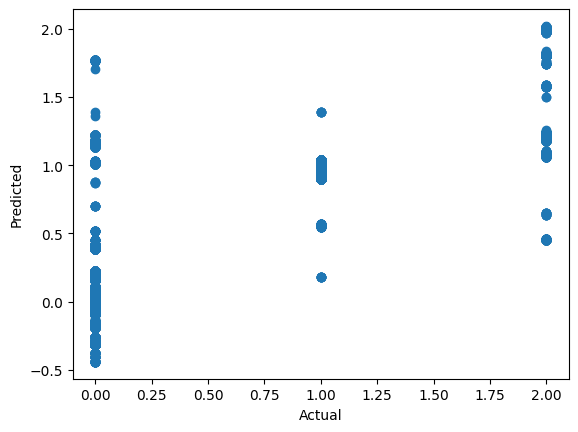

In [32]:
plt.scatter(y_test_encoded,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: >

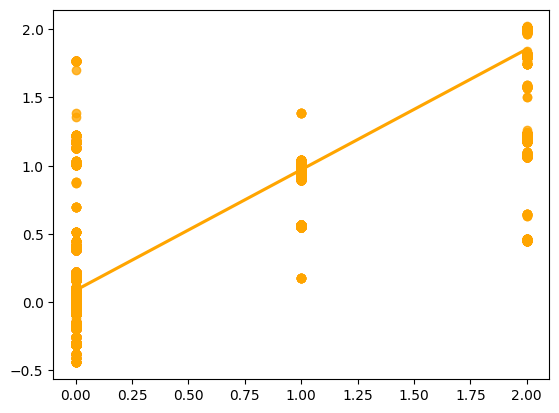

In [36]:
sns.regplot(x=y_test_encoded,y=y_pred,ci=None,color ='orange')

In [37]:
pred_df=pd.DataFrame({'Actual Value':y_test_encoded,'Predicted Value':y_pred,'Difference':y_test_encoded-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
0,1,1.008844,-0.008844
1,0,0.000468,-0.000468
2,2,2.005851,-0.005851
3,1,1.004438,-0.004438
4,1,0.948453,0.051547
...,...,...,...
37371,0,0.084041,-0.084041
37372,1,0.989974,0.010026
37373,1,1.008844,-0.008844
37374,0,-0.000447,0.000447


In [38]:
print(lin_model.predict(X_test[1]))

[0.0004675]
